In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# DATA collection

In [4]:
X=pd.read_csv('./Training Data/Logistic_X_Train.csv').values
Y=pd.read_csv('./Training Data/Logistic_Y_Train.csv').values
print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [8]:
print(X[5])

[0.65653223 0.99143964 0.8702798 ]


In [11]:
def segregate(X,Y):
    X1=[]
    X2=[]
    for i in range(3000):
        if Y[i]==0:
            X1.append(X[i])
        else:
            X2.append(X[i])
            
    return X1,X2

In [12]:
X1,X2=segregate(X,Y)

In [17]:
X1=np.array(X1)
X2=np.array(X2)

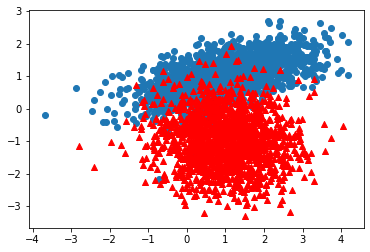

In [20]:
plt.scatter(X1[:,1],X1[:,2])
plt.scatter(X2[:,1],X2[:,2],marker='^',color='red')
plt.show()

# Logistic Regression

In [57]:
xtest=pd.read_csv('./Test Cases/Logistic_X_Test.csv').values
print(xtest.shape)

(1000, 3)


In [45]:
def hypothesis(x,w,b):
    return signoid(np.dot(x,w)+b)


def signoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(X,Y,w,b):
    m=X.shape[0]
    
    e=0.0
    
    for i in range(m):
        hx=hypothesis(X[i],w,b)
        e+=Y[i]*np.log2(hx)+(1-Y[i])*np.log2(1-hx)
        
    return -e/m

def get_grad(X,Y,w,b):
    m=X.shape[0]
    
    grad_w=np.zeros((w.shape))
    grad_b=0.0
    
    for i in range(m):
        hx=hypothesis(X[i],w,b)
        grad_w+=(Y[i]-hx)*X[i]
        grad_b+=(Y[i]-hx)
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

def gradient_assent(X,Y,learning_rate=0.1,epocs=3000):
    acc_lst=[]
    err_lst=[]
    w=[0.0,0.0,0.0]
    b=0.0
    w=np.array(w)
    for i in range(epocs):
        e=error(X,Y,w,b)
        a=get_acc(X,Y,w,b)
        err_lst.append(e)
        acc_lst.append(a)
        grad=get_grad(X,Y,w,b)
        w=w+learning_rate*grad[0]
        b=b+learning_rate*grad[1]
        
    return err_lst,acc_lst,w,b

def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]
    
    
    
    

In [46]:
errlist,acclist,w,b=gradient_assent(X,Y)

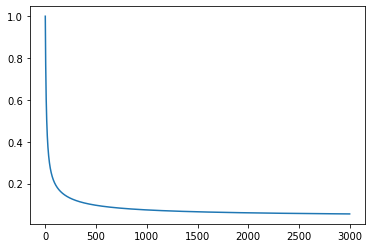

In [47]:
plt.plot(errlist)

In [48]:
print(w)

[-3.04520379  2.29740685 -2.4363518 ]


In [49]:
print(b)

[-2.94977573]


In [50]:
print(errlist[-1])

[0.05510226]


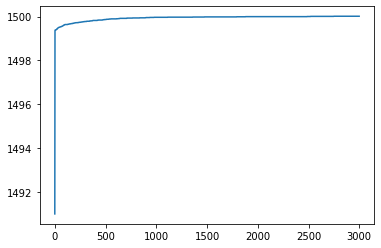

In [52]:
plt.plot(acclist)

In [58]:
y_pred=[]

for i in range(xtest.shape[0]):
    p = predict(xtest[i],w,b)
    y_pred.append(p)

y_pred=np.array(y_pred)
print(y_pred)


[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 

In [59]:
df=pd.DataFrame(data=y_pred,columns=["label"])
df.to_csv('submission.csv',index=False)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model=LogisticRegression()

In [66]:
Y=Y.reshape(-1)
model.fit(X,Y)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
intercept=model.intercept_
coef=model.coef_

In [68]:
print(intercept)

[-3.84066701]


In [69]:
print(coef)

[[-3.68470635  2.8811019  -2.24745975]]


0.999
